In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import io, util
from skimage.util import img_as_ubyte
from skimage.io import imread, imshow
from skimage.morphology import erosion, dilation, opening, closing,square,rectangle,binary_closing,disk
from skimage import exposure, color,measure


/home/nive/.local/lib/python3.6/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from uint8 to bool
  .format(dtypeobj_in, dtypeobj_out))


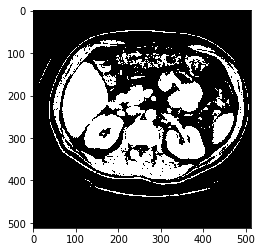

In [2]:

image = imread('kidney.jpg',0)
image = util.img_as_bool(image)
plt.imshow(image,cmap = 'gray')

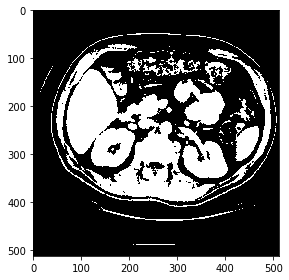

In [3]:
# dil = dilation(image)
# imshow(dil, cmap = 'gray')
er = closing(image)
imshow(er,cmap ='gray')

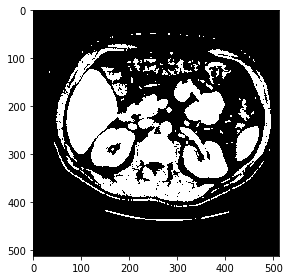

In [4]:
er = opening(image)
imshow(er,cmap ='gray')

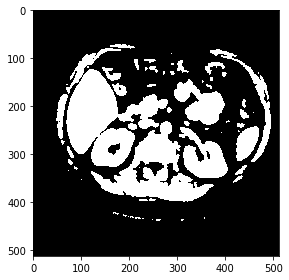

In [5]:
selem = np.array([[1,1,1,1],[0,1,1,0],[0,1,1,0],[0,0,0,0]])
er = opening(image,selem)
er = opening(er,np.rot90(selem,1))
er = opening(er,np.rot90(selem,2))
er = opening(er,np.rot90(selem,3))
imshow(er,cmap = 'gray')



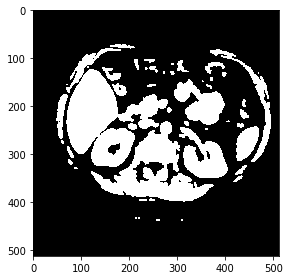

In [6]:
selem1 = np.array([[0,1],[0,1],[0,1]])
er = opening(er,selem1)
er = opening(er,np.rot90(selem1,1))
er = opening(er,np.rot90(selem1,2))
er = opening(er,np.rot90(selem1,3))
imshow(er,cmap = 'gray')


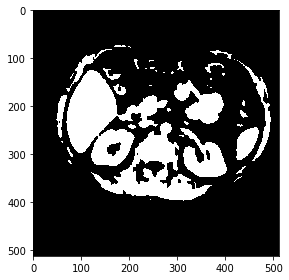

In [7]:
selem2 = rectangle(5,2)
er = erosion(er,selem2)
imshow(er,cmap = 'gray')


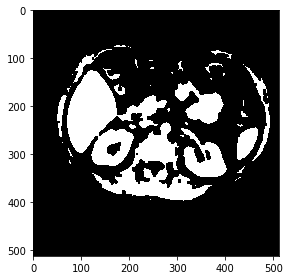

In [8]:
selem2 = rectangle(5,2)
er = erosion(er,np.rot90(selem1,1))
imshow(er,cmap = 'gray')

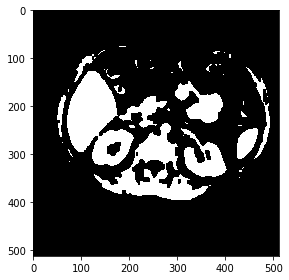

In [9]:
selem2 = rectangle(5,2)
er = erosion(er,np.rot90(selem1,2))
imshow(er,cmap = 'gray')

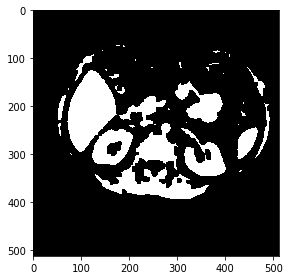

In [10]:
selem2 = rectangle(5,2)
er = erosion(er,np.rot90(selem1,3))
imshow(er,cmap = 'gray')

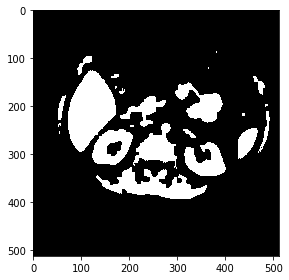

In [11]:
selem3 = np.array([[1,0,0,1],[1,0,0,1],[1,0,0,1],[1,0,0,1]])
er = opening(er,selem3)
imshow(er,cmap = 'gray')

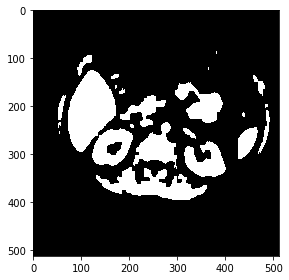

In [12]:
selem4 = np.array([[1,1,1]])
er = dilation(er,np.rot90(selem4))
imshow(er,cmap = 'gray')

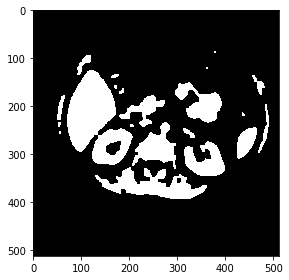

In [13]:
selem3 = np.array([[1,0,0,1],[1,0,0,1],[1,0,0,1],[1,0,0,1],[1,0,0,1]])
er = erosion(er,selem3)
er = dilation(er,square(4))
imshow(er,cmap = 'gray')

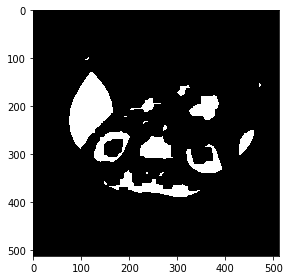

In [14]:
selem5 = square(10)
er = erosion(er,np.rot90(selem5))
er = erosion(er,np.array([[0,0,0],[0,1,0],[0,0,0]]))
imshow(er,cmap = 'gray')

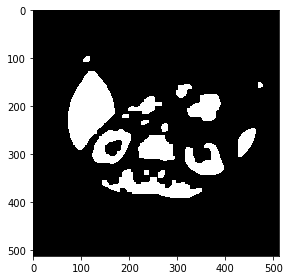

In [15]:
selem6 = square(7)
er = dilation(er,selem6)
imshow(er,cmap = 'gray')

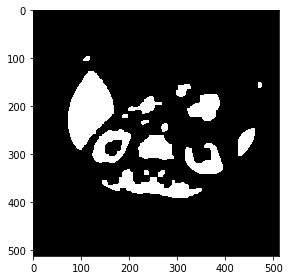

In [16]:
er = erosion(er,np.array([[0,0,0,0],[0,1,1,0],[0,1,1,0],[0,0,0,0]]))
imshow(er,cmap = 'gray')

9


/home/nive/.local/lib/python3.6/site-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
/home/nive/.local/lib/python3.6/site-packages/skimage/measure/_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


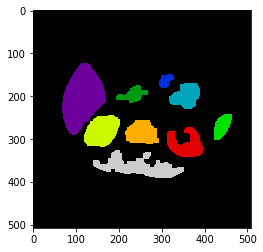

In [17]:

Z = util.view_as_windows(er, (5, 5))
Z = Z.reshape(Z.shape[0], Z.shape[1], -1)
variance_map = Z.var(axis=2)
from scipy import ndimage as ndi

tools_bw = variance_map > 0.001
# tools_bw =opening(tools_bw, np.ones((5, 5)))
tools_bw = ndi.binary_fill_holes(tools_bw)


labels = measure.label(tools_bw)
regions = measure.regionprops(labels)
regions = [r for r in regions if r.perimeter > 100 and r.perimeter < 800 and r.major_axis_length > 10]

print(len(regions))

out = np.zeros_like(tools_bw, dtype=int)
for i, r in enumerate(regions):
    out[labels == r.label] = i + 1

plt.imshow(out, cmap='nipy_spectral')

plt.show()

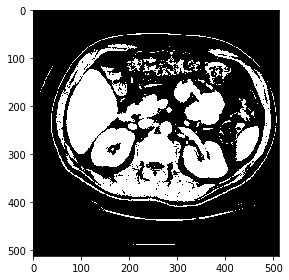

In [56]:
imshow(image)

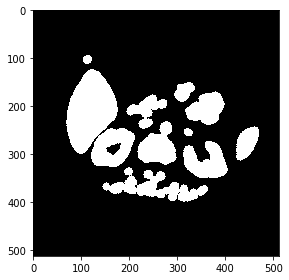

In [61]:
selem = disk(8)
t = opening(image,selem)
imshow(t)

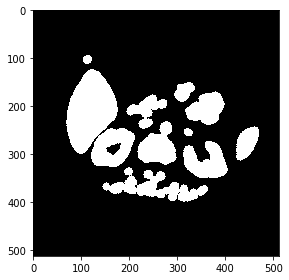

In [62]:
selem = disk(1)
t = opening(t,selem)
imshow(t)

8


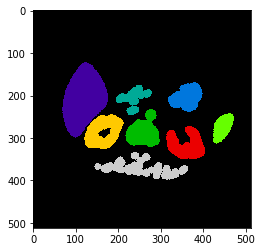

In [63]:
labels = measure.label(t)
regions = measure.regionprops(labels)
regions = [r for r in regions if r.perimeter > 150 and r.perimeter < 900 and r.major_axis_length > 10]

print(len(regions))

out = np.zeros_like(t, dtype=int)
for i, r in enumerate(regions):
    out[labels == r.label] = i + 1

plt.imshow(out, cmap='nipy_spectral')

plt.show()